Import modules

In [246]:
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

Change configuration in pandas so all columns of a dataframe are displayed.

In [247]:
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', None)

Read in api from open5e.com.
This contains information on all spells from Dunegeons & Dragons.
Data source: https://open5e.com/

In [248]:
r = requests.get("https://api.open5e.com/spells/?limit=1000")
r2 = r.json()['results']
open5e = pd.DataFrame(data=r2)
open5e.head()

,slug,name,desc,higher_level,page,range,components,material,ritual,duration,concentration,casting_time,level,level_int,school,dnd_class,archetype,circles,document__slug,document__title,document__license_url
0,abhorrent-apparition,Abhorrent Apparition,You imbue a terrifying visage onto a gourd and...,If you cast this spell using a spell slot of 5...,,60 feet,M,a gourd with a face carved on it,no,Instantaneous,no,1 action,4th-level,4,illusion,"Bard, Sorcerer, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
1,accelerate,Accelerate,Choose up to three willing creatures within ra...,When you cast this spell using a spell slot of...,,Touch,"V, S, M",a toy top,no,Up to 1 minute,yes,1 action,3rd-level,3,transmutation,"Bard, Cleric, Druid, Sorcerer, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
2,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,phb 259,90 feet,"V, S, M",Powdered rhubarb leaf and an adder's stomach.,no,Instantaneous,no,1 action,2nd-level,2,Evocation,"Druid, Wizard",Druid: Swamp,Swamp,wotc-srd,Systems Reference Document,http://open5e.com/legal
3,acid-gate,Acid Gate,"You create a portal of swirling, acidic green ...",When you cast this spell using a spell slot of...,,60 feet,"V, S, M",a vial of acid and a polished silver mirror wo...,no,Up to 1 minute,yes,1 action,7th-level,7,conjuration,,,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
4,acid-rain,Acid Rain,You unleash a storm of swirling acid in a cyli...,When you cast this spell using a spell slot of...,,150 feet,"V, S, M",a drop of acid,no,Up to 1 minute,yes,1 action,5th-level,5,conjuration,"Sorcerer, Warlock, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal


A count of all spells in the "open5e" dataframe. This contains more spells than I was expecting.

In [249]:
open5e.count()

slug                     835
name                     835
desc                     835
higher_level             835
page                     835
range                    835
components               835
material                 835
ritual                   835
duration                 835
concentration            835
casting_time             835
level                    835
level_int                835
school                   835
dnd_class                835
archetype                835
circles                  835
document__slug           835
document__title          835
document__license_url    835
dtype: int64

Dungeons & Dragons has had additional spells added to the game from various sources. For the purposes of this prject, I only want information from the "Player's Handbook," referenced in this data as "Systems Reference Document."

Here, I am looking for the titles of all source books.

In [250]:
print(open5e["document__title"].unique())

['Deep Magic for 5th Edition' 'Systems Reference Document' 'Open5e OGL']


Removing all source books other than the "Player's Handbook."

In [251]:
open5e = open5e.loc[open5e['document__title'] == 'Systems Reference Document']
open5e.head()

,slug,name,desc,higher_level,page,range,components,material,ritual,duration,concentration,casting_time,level,level_int,school,dnd_class,archetype,circles,document__slug,document__title,document__license_url
2,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,phb 259,90 feet,"V, S, M",Powdered rhubarb leaf and an adder's stomach.,no,Instantaneous,no,1 action,2nd-level,2,Evocation,"Druid, Wizard",Druid: Swamp,Swamp,wotc-srd,Systems Reference Document,http://open5e.com/legal
5,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,phb 211,60 feet,"V, S",,no,Instantaneous,no,1 action,Cantrip,0,Conjuration,"Sorcerer, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
9,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,phb 211,30 feet,"V, S, M",A tiny strip of white cloth.,no,8 hours,no,1 action,2nd-level,2,Abjuration,"Cleric, Paladin",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
10,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,phb 211,30 feet,"V, S, M",A tiny bell and a piece of fine silver wire.,yes,8 hours,no,1 minute,1st-level,1,Abjuration,"Ranger, Ritual Caster, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
16,alter-self,Alter Self,You assume a different form. When you cast the...,,phb 211,Self,"V, S",,no,Up to 1 hour,yes,1 action,2nd-level,2,Transmutation,"Sorcerer, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal


Counting the entries again.

In [252]:
open5e.count()

slug                     319
name                     319
desc                     319
higher_level             319
page                     319
range                    319
components               319
material                 319
ritual                   319
duration                 319
concentration            319
casting_time             319
level                    319
level_int                319
school                   319
dnd_class                319
archetype                319
circles                  319
document__slug           319
document__title          319
document__license_url    319
dtype: int64

Listing all columns in the open5e dataframe.

In [253]:
open5e.reset_index(inplace=True)

In [254]:
open5e.columns

Index(['index', 'slug', 'name', 'desc', 'higher_level', 'page', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'level_int', 'school', 'dnd_class',
       'archetype', 'circles', 'document__slug', 'document__title',
       'document__license_url'],
      dtype='object')

Removing unneeded columns and columns that will be redundant with later data, and renaming some other columns to suit my preference.

In [255]:
open5e.drop(columns=['index','page', 'level', 'material', 'archetype', 'circles', 'document__slug', 'document__title', 'document__license_url', 'ritual', 'concentration'],
        inplace=True)
open5e.rename(columns={'slug' : 'key', 'level_int' : 'level', 'dnd_class' : 'class'}, inplace=True)
open5e.columns

Index(['key', 'name', 'desc', 'higher_level', 'range', 'components',
       'duration', 'casting_time', 'level', 'school', 'class'],
      dtype='object')

Displaying the cleaned data

In [256]:
open5e.head()

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class
0,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,90 feet,"V, S, M",Instantaneous,1 action,2,Evocation,"Druid, Wizard"
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard"
2,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,30 feet,"V, S, M",8 hours,1 action,2,Abjuration,"Cleric, Paladin"
3,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,30 feet,"V, S, M",8 hours,1 minute,1,Abjuration,"Ranger, Ritual Caster, Wizard"
4,alter-self,Alter Self,You assume a different form. When you cast the...,,Self,"V, S",Up to 1 hour,1 action,2,Transmutation,"Sorcerer, Wizard"


The initial data does not contain all of the inforamtion that I am looking for. Specifically, I want information on the damage each spell deals. I found the data in a different api, which is more difficult to work with.

In this data source, information on each spells will require a seperate api pull. This initial dataframe contains the names of each spell, along with the sub domains of the urls needed to pull the apis.

Data source: https://www.dnd5eapi.co/ 

In [257]:
r = requests.get('http://www.dnd5eapi.co/api/spells')
b = r.json()['results']
url_list = pd.DataFrame(data=b)
url_list.head()

,index,name,url
0,acid-arrow,Acid Arrow,/api/spells/acid-arrow
1,acid-splash,Acid Splash,/api/spells/acid-splash
2,aid,Aid,/api/spells/aid
3,alarm,Alarm,/api/spells/alarm
4,alter-self,Alter Self,/api/spells/alter-self


Counting the number of entries. 319 entries, matching the data from the other source.

In [258]:
url_list.count()

index    319
name     319
url      319
dtype: int64

I need to append the provided url subdirectories to the top level domain so I can run all of the apis. Here, I concatonate them and create a list.

In [259]:
spells_url = []

for url in url_list["url"]:
    spells_url.append('http://www.dnd5eapi.co' + url)

print(spells_url[0:5])

['http://www.dnd5eapi.co/api/spells/acid-arrow', 'http://www.dnd5eapi.co/api/spells/acid-splash', 'http://www.dnd5eapi.co/api/spells/aid', 'http://www.dnd5eapi.co/api/spells/alarm', 'http://www.dnd5eapi.co/api/spells/alter-self']


Reading in api for each spell, then concatonating them into a single dataframe.

In [260]:
full = []

for i in spells_url:
    data = requests.get(i)
    data_json = data.json()
    data_normal = pd.json_normalize(data_json)
    full.append(data_normal)
    

dnd5eapi = pd.concat(full)

In [261]:
dnd5eapi.reset_index(inplace=True)

In [262]:
dnd5eapi.count()

level_0                                319
index                                  319
name                                   319
desc                                   319
higher_level                           319
range                                  319
components                             319
material                               184
ritual                                 319
duration                               319
concentration                          319
casting_time                           319
level                                  319
attack_type                             16
classes                                319
subclasses                             319
url                                    319
damage.damage_type.index                64
damage.damage_type.name                 64
damage.damage_type.url                  64
damage.damage_at_slot_level.2           14
damage.damage_at_slot_level.3           17
damage.damage_at_slot_level.4           27
damage.dama

Displaying the data from dnd5eapi.co

In [263]:
dnd5eapi.head()

,level_0,index,name,desc,higher_level,range,components,material,ritual,duration,concentration,casting_time,level,attack_type,classes,subclasses,url,damage.damage_type.index,damage.damage_type.name,damage.damage_type.url,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,school.index,school.name,school.url,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,dc.dc_type.index,dc.dc_type.name,dc.dc_type.url,dc.dc_success,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,dc.desc,damage.damage_at_slot_level.1,heal_at_slot_level.1
0,0,acid-arrow,Acid Arrow,[A shimmering green arrow streaks toward a tar...,[When you cast this spell using a spell slot o...,90 feet,"[V, S, M]",Powdered rhubarb leaf and an adder's stomach.,False,Instantaneous,False,1 action,2,ranged,"[{'index': 'wizard', 'name': 'Wizard', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/acid-arrow,acid,Acid,/api/damage-types/acid,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,evocation,Evocation,/api/magic-schools/evocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,acid-splash,Acid Splash,[You hurl a bubble of acid. Choose one creatur...,[],60 feet,"[V, S]",NaN,False,Instantaneous,False,1 action,0,NaN,"[{'index': 'sorcerer', 'name': 'Sorcerer', 'ur...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/acid-splash,acid,Acid,/api/damage-types/acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conjuration,Conjuration,/api/magic-schools/conjuration,1d6,2d6,3d6,4d6,dex,DEX,/api/ability-scores/dex,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,aid,Aid,[Your spell bolsters your allies with toughnes...,[When you cast this spell using a spell slot o...,30 feet,"[V, S, M]",A tiny strip of white cloth.,False,8 hours,False,1 action,2,NaN,"[{'index': 'cleric', 'name': 'Cleric', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/aid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abjuration,Abjuration,/api/magic-schools/abjuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN,NaN,NaN,NaN
3,0,alarm,Alarm,[You set an alarm against unwanted intrusion. ...,[],30 feet,"[V, S, M]",A tiny bell and a piece of fine silver wire.,True,8 hours,False,1 minute,1,NaN,"[{'index': 'ranger', 'name': 'Ranger', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/alarm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abjuration,Abjuration,/api/magic-schools/abjuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0,NaN,NaN,NaN
4,0,alter-self,Alter Self,[You assume a different form. When you cast th...,[],Self,"[V, S]",NaN,False,Up to 1 hour,True,1 action,2,NaN,"[{'index': 'sorcerer', 'name': 'Sorcerer', 'ur...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/alter-self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transmutation,Transmutation,/api/magic-schools/transmutation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns from the dnd5eapi data. Note that many of the columns are redundant with the open5e data. 

In [264]:
dnd5eapi.columns

Index(['level_0', 'index', 'name', 'desc', 'higher_level', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'attack_type', 'classes', 'subclasses', 'url',
       'damage.damage_type.index', 'damage.damage_type.name',
       'damage.damage_type.url', 'damage.damage_at_slot_level.2',
       'damage.damage_at_slot_level.3', 'damage.damage_at_slot_level.4',
       'damage.damage_at_slot_level.5', 'damage.damage_at_slot_level.6',
       'damage.damage_at_slot_level.7', 'damage.damage_at_slot_level.8',
       'damage.damage_at_slot_level.9', 'school.index', 'school.name',
       'school.url', 'damage.damage_at_character_level.1',
       'damage.damage_at_character_level.5',
       'damage.damage_at_character_level.11',
       'damage.damage_at_character_level.17', 'dc.dc_type.index',
       'dc.dc_type.name', 'dc.dc_type.url', 'dc.dc_success',
       'heal_at_slot_level.2', 'heal_at_slot_level.3', 'heal_at_slot_level.4',
       

Removing unneeded columns and redundant columns, and renaming some other columns to suit my preference.

In [265]:
dnd5eapi.drop(columns=['level_0','name', 'desc', 'higher_level', 'range', 'components', 'material', 'duration', 'casting_time', 'level', 
                       'attack_type', 'classes', 'subclasses', 'url', 'damage.damage_type.index', 'damage.damage_type.url', 'school.index', 'school.name',
                       'school.url', 'dc.dc_type.index', 'dc.dc_type.name', 'dc.dc_type.url', 'dc.dc_success', 'dc.desc'],
        inplace=True)
dnd5eapi.rename(columns={'index':'key', 'damage.damage_type.name':'damage_type',
                        'damage.damage_at_slot_level.2' : 'dmg_slot_2', 'damage.damage_at_slot_level.3' : 'dmg_slot_3',
                        'damage.damage_at_slot_level.4' : 'dmg_slot_4', 'damage.damage_at_slot_level.5' : 'dmg_slot_5',
                        'damage.damage_at_slot_level.6' : 'dmg_slot_6', 'damage.damage_at_slot_level.7' : 'dmg_slot_7',
                        'damage.damage_at_slot_level.8' : 'dmg_slot_8', 'damage.damage_at_slot_level.9' : 'dmg_slot_9',
                        'damage.damage_at_character_level.1' : 'c_dmg_1', 'damage.damage_at_character_level.5' : 'c_dmg_5',
                        'damage.damage_at_character_level.11' : 'c_dmg_11', 'damage.damage_at_character_level.17' : 'c_dmg_17',
                        'heal_at_slot_level.2' : 'heal_slot_2', 'heal_at_slot_level.3' : 'heal_slot_3', 'heal_at_slot_level.4' : 'heal_slot_4', 
                        'heal_at_slot_level.5' : 'heal_slot_5', 'heal_at_slot_level.6' : 'heal_slot_6', 'heal_at_slot_level.7' : 'heal_slot_7', 
                        'heal_at_slot_level.8' : 'heal_slot_8', 'heal_at_slot_level.9' : 'heal_slot_9',
                        'damage.damage_at_slot_level.1': 'dmg_slot_1', 'heal_at_slot_level.1' : 'heal_slot_1'}, inplace=True)
dnd5eapi.columns

Index(['key', 'ritual', 'concentration', 'damage_type', 'dmg_slot_2',
       'dmg_slot_3', 'dmg_slot_4', 'dmg_slot_5', 'dmg_slot_6', 'dmg_slot_7',
       'dmg_slot_8', 'dmg_slot_9', 'c_dmg_1', 'c_dmg_5', 'c_dmg_11',
       'c_dmg_17', 'heal_slot_2', 'heal_slot_3', 'heal_slot_4', 'heal_slot_5',
       'heal_slot_6', 'heal_slot_7', 'heal_slot_8', 'heal_slot_9',
       'area_of_effect.type', 'area_of_effect.size', 'dmg_slot_1',
       'heal_slot_1'],
      dtype='object')

Then, placing some columns in a different order for display purposes.

In [266]:
dnd5eapi = dnd5eapi[['key', 'ritual', 'concentration', 'damage_type', 'dmg_slot_1', 'dmg_slot_2',
       'dmg_slot_3', 'dmg_slot_4', 'dmg_slot_5', 'dmg_slot_6', 'dmg_slot_7',
       'dmg_slot_8', 'dmg_slot_9', 'c_dmg_1', 'c_dmg_5', 'c_dmg_11',
       'c_dmg_17', 'heal_slot_1', 'heal_slot_2', 'heal_slot_3', 'heal_slot_4', 'heal_slot_5',
       'heal_slot_6', 'heal_slot_7', 'heal_slot_8', 'heal_slot_9',
       'area_of_effect.type', 'area_of_effect.size']]

Displaying cleaned data

In [267]:
dnd5eapi.head()

,key,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size
0,acid-arrow,False,False,Acid,NaN,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid-splash,False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aid,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN
3,alarm,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0
4,alter-self,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merging the two dataframes. All of the data I was looking for is now contained in a single dataframe.

In [268]:
spells = pd.merge(open5e, dnd5eapi, on='key', how='left')
spells.head()

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size
0,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,90 feet,"V, S, M",Instantaneous,1 action,2,Evocation,"Druid, Wizard",False,False,Acid,NaN,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard",False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,30 feet,"V, S, M",8 hours,1 action,2,Abjuration,"Cleric, Paladin",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN
3,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,30 feet,"V, S, M",8 hours,1 minute,1,Abjuration,"Ranger, Ritual Caster, Wizard",True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0
4,alter-self,Alter Self,You assume a different form. When you cast the...,,Self,"V, S",Up to 1 hour,1 action,2,Transmutation,"Sorcerer, Wizard",False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count of the merged dataframe. There are 319 entries, as expected.

In [269]:
spells.count()

key                    319
name                   319
desc                   319
higher_level           319
range                  319
components             319
duration               319
casting_time           319
level                  319
school                 319
class                  319
ritual                 316
concentration          316
damage_type             64
dmg_slot_1               8
dmg_slot_2              14
dmg_slot_3              17
dmg_slot_4              27
dmg_slot_5              23
dmg_slot_6              32
dmg_slot_7              30
dmg_slot_8              30
dmg_slot_9              28
c_dmg_1                 10
c_dmg_5                 10
c_dmg_11                10
c_dmg_17                10
heal_slot_1              3
heal_slot_2              5
heal_slot_3              6
heal_slot_4              6
heal_slot_5              7
heal_slot_6              8
heal_slot_7              9
heal_slot_8              8
heal_slot_9              9
area_of_effect.type     87
a

I noticed that there 3 NaN values in the "ritual" and "concentration" columns. This should not be that case. 

In [270]:
spells['ritual'].value_counts(dropna=False)

False    287
True      29
NaN        3
Name: ritual, dtype: int64

Finding the rows with NaN in "ritual". These rows also have NaN in "concentration".

In [271]:
spells[spells['ritual'].isna()]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,blindnessdeafness,Blindness/Deafness,You can blind or deafen a foe. Choose one crea...,When you cast this spell using a spell slot of...,30 feet,V,1 minute,1 action,2,Necromancy,"Bard, Cleric, Sorcerer, Warlock, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,enlargereduce,Enlarge/Reduce,You cause a creature or an object you can see ...,,30 feet,"V, S, M",Up to 1 minute,1 action,2,Transmutation,"Sorcerer, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These spells have unique characteristics, so their data was listed incorrectly. I know that for all of these spells, "ritual" and "concentration" should be False.

Correcting this data.

In [272]:
spells.loc[[12]]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
spells['ritual'] = spells['ritual'].fillna(False)
spells['concentration'] = spells['concentration'].fillna(False)

Verifying that the corrction has worked.

In [274]:
spells.loc[[12]]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
spells['ritual'].value_counts(dropna=False)

False    290
True      29
Name: ritual, dtype: int64

In [276]:
spells['concentration'].value_counts(dropna=False)

False    194
True     125
Name: concentration, dtype: int64

In [277]:
spells.count()

key                    319
name                   319
desc                   319
higher_level           319
range                  319
components             319
duration               319
casting_time           319
level                  319
school                 319
class                  319
ritual                 319
concentration          319
damage_type             64
dmg_slot_1               8
dmg_slot_2              14
dmg_slot_3              17
dmg_slot_4              27
dmg_slot_5              23
dmg_slot_6              32
dmg_slot_7              30
dmg_slot_8              30
dmg_slot_9              28
c_dmg_1                 10
c_dmg_5                 10
c_dmg_11                10
c_dmg_17                10
heal_slot_1              3
heal_slot_2              5
heal_slot_3              6
heal_slot_4              6
heal_slot_5              7
heal_slot_6              8
heal_slot_7              9
heal_slot_8              8
heal_slot_9              9
area_of_effect.type     87
a

First, I want to look at some basic information about the data.

Each spell can require one or more 'component' in order to be cast. Here, I determine how many spells require each type of component.

In [278]:
has_components = pd.DataFrame({'Component Type' : ['Verbal','Somatic', 'Materials'], 
                               'count' : [spells['components'].str.count('V').sum(),
                                          spells['components'].str.count('S').sum(),
                                          spells['components'].str.count('M').sum(),]})

has_components

,Component Type,count
0,Verbal,312
1,Somatic,286
2,Materials,184


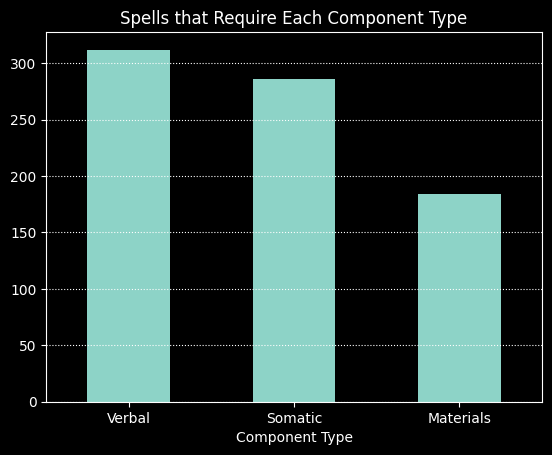

In [279]:
has_components.plot(kind='bar', x='Component Type', legend=None)
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.title('Spells that Require Each Component Type')
plt.show()


Some spells can be cast as a ritual. Some require "concentration" when they are cast. Here I determine what percentage of spells can be cast as a rituual, and what percentage require concentration.

In [280]:
is_ritual = pd.Series.to_list(spells['ritual'].value_counts())

is_concentration = pd.Series.to_list(spells['concentration'].value_counts())

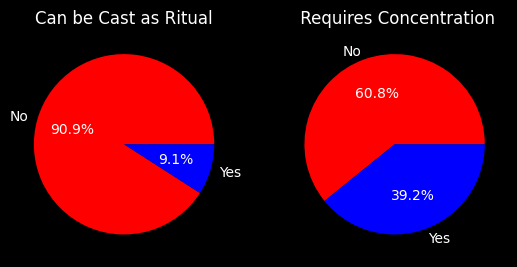

In [281]:
fig, axs = plt.subplots(1, 2)

axs[0].pie(is_ritual, labels = ["No","Yes"], colors = ["red", "blue"], autopct='%1.1f%%')
axs[0].title.set_text("Can be Cast as Ritual")

axs[1].pie(is_concentration, labels = ["No","Yes"], colors = ["red", "blue"], autopct='%1.1f%%')
axs[1].title.set_text(" Requires Concentration")

plt.show()


Each character class can cast only certain spells, but some spells can be cast by multiple classes. Here, I determine how many spells each class can cast.

In [282]:
class_spells = pd.DataFrame({'Class' : ['Bard','Cleric', 'Druid', 'Paladin', 'Ranger','Sorcerer', 'Warlock', 'Wizard'], 
                               'count' : [spells['class'].str.count('Bard').sum(),
                                          spells['class'].str.count('Cleric').sum(),
                                          spells['class'].str.count('Druid').sum(),
                                          spells['class'].str.count('Paladin').sum(),
                                          spells['class'].str.count('Ranger').sum(),
                                          spells['class'].str.count('Sorcerer').sum(),
                                          spells['class'].str.count('Warlock').sum(),
                                          spells['class'].str.count('Wizard').sum()]})

class_spells

,Class,count
0,Bard,112
1,Cleric,143
2,Druid,125
3,Paladin,54
4,Ranger,37
5,Sorcerer,120
6,Warlock,89
7,Wizard,204


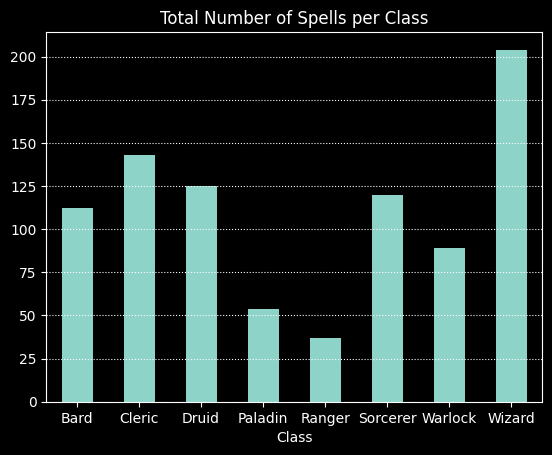

In [283]:
class_spells.plot(kind='bar', x='Class', legend=None)
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.title('Total Number of Spells per Class')
plt.show()

Each spell has a spell level, ranging from 0 to 9.
Here we determine how many spells there are of each level.

In [344]:
spell_level = spells['level'].value_counts().sort_index()
print(spell_level)

0    24
1    49
2    54
3    42
4    31
5    37
6    31
7    20
8    16
9    15
Name: level, dtype: int64


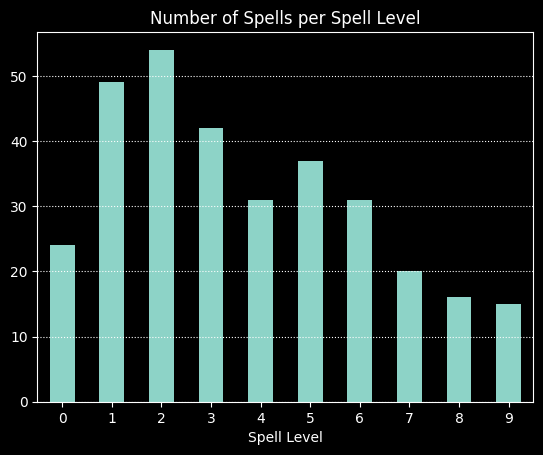

In [285]:
spell_level.plot(kind='bar')
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.xlabel('Spell Level')
plt.title('Number of Spells per Spell Level')
plt.show()

Every spell comes from a magic "school". Here I determine how many spells come from each school.

In [343]:
spell_school = spells['school'].value_counts()
print(spell_school)

Evocation        60
Transmutation    59
Conjuration      52
Abjuration       39
Enchantment      29
Divination       29
Illusion         27
Necromancy       24
Name: school, dtype: int64


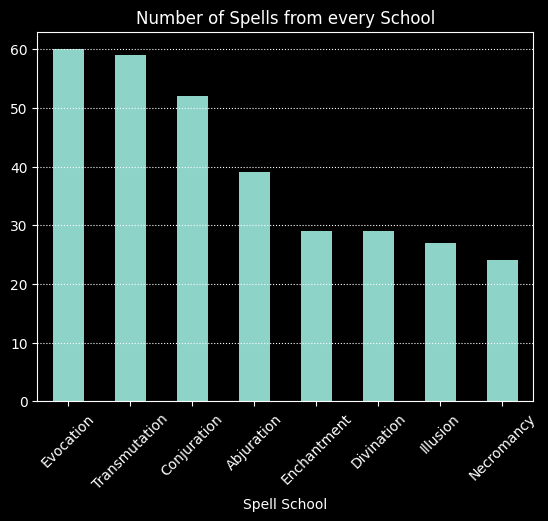

In [348]:
spell_school.plot(kind='bar')
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=45)
plt.xlabel('Spell School')
plt.title('Number of Spells from every School')
plt.show()

Level 0 spells area also called Cantrips. Cantrips can be used often, and they grow in power as characters grow. I want to see how each cantrip increases as character levels increase.

Damage in Dungeons and Dragons is calculated by rolling a specified number of dice, using multiple types of dice with different numbers of sides. As an example, if a spell says to roll 2d8 damge, then you would roll 2 eight-sided dice, then add the total together. This format is easy to read, but since the values are all strings it is difficult to make calculations based on the give data.

To remedy this, I want to convert all instances of these "dice format" strings to floats.

Frist, I get a dataframe containing the data of only Cantrips that deal damage.

In [371]:
cantrips = spells.loc[spells['level'] == 0]
cantrips.dropna(subset=['c_dmg_1'], inplace=True)
cantrips.head()

C:\Users\Adam\AppData\Local\Temp\ipykernel_8516\400767255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips.dropna(subset=['c_dmg_1'], inplace=True)


,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,dmg_slot_1,dmg_slot_2,dmg_slot_3,dmg_slot_4,dmg_slot_5,dmg_slot_6,dmg_slot_7,dmg_slot_8,dmg_slot_9,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,heal_slot_1,heal_slot_2,heal_slot_3,heal_slot_4,heal_slot_5,heal_slot_6,heal_slot_7,heal_slot_8,heal_slot_9,area_of_effect.type,area_of_effect.size,dice_roll,dice_size,average_damage,is_healing,type
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard",False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,3.0,False,X
39,chill-touch,Chill Touch,"You create a ghostly, skeletal hand in the spa...",,120 feet,"V, S",1 round,1 action,0,Necromancy,"Sorcerer, Warlock, Wizard",False,False,Necrotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d8,2d8,3d8,4d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,4.0,False,X
95,eldritch-blast,Eldritch Blast,A beam of crackling energy streaks toward a cr...,,120 feet,"V, S",Instantaneous,1 action,0,Evocation,Warlock,False,False,Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d10,2d10,3d10,4d10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,False,X
115,fire-bolt,Fire Bolt,You hurl a mote of fire at a creature or objec...,,120 feet,"V, S",Instantaneous,1 action,0,Evocation,"Sorcerer, Wizard",False,False,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d10,2d10,3d10,4d10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,False,X
221,poison-spray,Poison Spray,You extend your hand toward a creature you can...,,10 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Druid, Sorcerer, Warlock, Wizard",False,False,Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d12,2d12,3d12,4d12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,6.0,False,X


The columns of the cantrips dataframe.

The columns'c_dmg_1', 'c_dmg_5', 'c_dmg_11', and 'c_dmg_17' represent the damage each cantrip does at level 1, 5, 11, and 17, respectively.

In [372]:
cantrips.columns

Index(['key', 'name', 'desc', 'higher_level', 'range', 'components',
       'duration', 'casting_time', 'level', 'school', 'class', 'ritual',
       'concentration', 'damage_type', 'dmg_slot_1', 'dmg_slot_2',
       'dmg_slot_3', 'dmg_slot_4', 'dmg_slot_5', 'dmg_slot_6', 'dmg_slot_7',
       'dmg_slot_8', 'dmg_slot_9', 'c_dmg_1', 'c_dmg_5', 'c_dmg_11',
       'c_dmg_17', 'heal_slot_1', 'heal_slot_2', 'heal_slot_3', 'heal_slot_4',
       'heal_slot_5', 'heal_slot_6', 'heal_slot_7', 'heal_slot_8',
       'heal_slot_9', 'area_of_effect.type', 'area_of_effect.size',
       'dice_roll', 'dice_size', 'average_damage', 'is_healing', 'type'],
      dtype='object')

Removing unneeded data.

In [373]:
cantrips = cantrips[['key', 'name', 'range', 'damage_type','c_dmg_1', 'c_dmg_5', 'c_dmg_11', 'c_dmg_17']]
cantrips

,key,name,range,damage_type,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17
1,acid-splash,Acid Splash,60 feet,Acid,1d6,2d6,3d6,4d6
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8,2d8,3d8,4d8
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10,2d10,3d10,4d10
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10,2d10,3d10,4d10
221,poison-spray,Poison Spray,10 feet,Poison,1d12,2d12,3d12,4d12
230,produce-flame,Produce Flame,Self,Fire,1d8,2d8,3d8,4d8
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8,2d8,3d8,4d8
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8,2d8,3d8,4d8
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8,2d8,3d8,4d8
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4,2d4,3d4,4d4


To determine the damage the cantrips do at level 1, I first split the "dice format" damage, using 'd' as the delimiter.

In [374]:
cantrips[['dice_roll_1','dice_size_1']]= cantrips['c_dmg_1'].str.split('d', expand=True)
cantrips

C:\Users\Adam\AppData\Local\Temp\ipykernel_8516\9240979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips[['dice_roll_1','dice_size_1']]= cantrips['c_dmg_1'].str.split('d', expand=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_8516\9240979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips[['dice_roll_1','dice_size_1']]= cantrips['c_dmg_1'].str.split('d', expand=True)


,key,name,range,damage_type,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,dice_roll_1,dice_size_1
1,acid-splash,Acid Splash,60 feet,Acid,1d6,2d6,3d6,4d6,1,6
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8,2d8,3d8,4d8,1,8
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10,2d10,3d10,4d10,1,10
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10,2d10,3d10,4d10,1,10
221,poison-spray,Poison Spray,10 feet,Poison,1d12,2d12,3d12,4d12,1,12
230,produce-flame,Produce Flame,Self,Fire,1d8,2d8,3d8,4d8,1,8
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8,2d8,3d8,4d8,1,8
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8,2d8,3d8,4d8,1,8
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8,2d8,3d8,4d8,1,8
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4,2d4,3d4,4d4,1,4


The data types of columns. The new data needs to be converted into floats.

In [375]:
cantrips.dtypes

key            object
name           object
range          object
damage_type    object
c_dmg_1        object
c_dmg_5        object
c_dmg_11       object
c_dmg_17       object
dice_roll_1    object
dice_size_1    object
dtype: object

In [376]:
cantrips = cantrips.astype({'dice_roll_1' : 'float', 'dice_size_1' : 'float'})

In [377]:
cantrips.dtypes

key             object
name            object
range           object
damage_type     object
c_dmg_1         object
c_dmg_5         object
c_dmg_11        object
c_dmg_17        object
dice_roll_1    float64
dice_size_1    float64
dtype: object

Here I determine the average damage that the cantrip deals by multiplying the number of dice rolled by half of the max value of the die. (Note: in D&D, decimals are always rounded down)

In [378]:
cantrips['avg_dmg_1'] = cantrips['dice_roll_1'] * (cantrips['dice_size_1'] * 0.5)
cantrips

,key,name,range,damage_type,c_dmg_1,c_dmg_5,c_dmg_11,c_dmg_17,dice_roll_1,dice_size_1,avg_dmg_1
1,acid-splash,Acid Splash,60 feet,Acid,1d6,2d6,3d6,4d6,1.0,6.0,3.0
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8,2d8,3d8,4d8,1.0,8.0,4.0
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10,2d10,3d10,4d10,1.0,10.0,5.0
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10,2d10,3d10,4d10,1.0,10.0,5.0
221,poison-spray,Poison Spray,10 feet,Poison,1d12,2d12,3d12,4d12,1.0,12.0,6.0
230,produce-flame,Produce Flame,Self,Fire,1d8,2d8,3d8,4d8,1.0,8.0,4.0
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8,2d8,3d8,4d8,1.0,8.0,4.0
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8,2d8,3d8,4d8,1.0,8.0,4.0
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8,2d8,3d8,4d8,1.0,8.0,4.0
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4,2d4,3d4,4d4,1.0,4.0,2.0


Here I repeat the process for the damge at levels 5, 11, and 17.

I also remove the columns used only in calculations.

In [380]:
cantrips[['dice_roll_5','dice_size_5']]= cantrips['c_dmg_5'].str.split('d', expand=True)
cantrips[['dice_roll_11','dice_size_11']]= cantrips['c_dmg_11'].str.split('d', expand=True)
cantrips[['dice_roll_17','dice_size_17']]= cantrips['c_dmg_17'].str.split('d', expand=True)

cantrips = cantrips.astype({'dice_roll_5' : 'float', 'dice_size_5' : 'float',
                           'dice_roll_11' : 'float', 'dice_size_11' : 'float',
                           'dice_roll_17' : 'float', 'dice_size_17' : 'float'})

cantrips['avg_dmg_5'] = cantrips['dice_roll_5'] * (cantrips['dice_size_5'] * 0.5)
cantrips['avg_dmg_11'] = cantrips['dice_roll_11'] * (cantrips['dice_size_11'] * 0.5)
cantrips['avg_dmg_17'] = cantrips['dice_roll_17'] * (cantrips['dice_size_17'] * 0.5)

cantrips = cantrips[['key', 'name', 'range', 'damage_type','avg_dmg_1', 'avg_dmg_5', 'avg_dmg_11', 'avg_dmg_17']]

cantrips


,key,name,range,damage_type,avg_dmg_1,avg_dmg_5,avg_dmg_11,avg_dmg_17
1,acid-splash,Acid Splash,60 feet,Acid,3.0,6.0,9.0,12.0
39,chill-touch,Chill Touch,120 feet,Necrotic,4.0,8.0,12.0,16.0
95,eldritch-blast,Eldritch Blast,120 feet,Force,5.0,10.0,15.0,20.0
115,fire-bolt,Fire Bolt,120 feet,Fire,5.0,10.0,15.0,20.0
221,poison-spray,Poison Spray,10 feet,Poison,6.0,12.0,18.0,24.0
230,produce-flame,Produce Flame,Self,Fire,4.0,8.0,12.0,16.0
239,ray-of-frost,Ray of Frost,60 feet,Cold,4.0,8.0,12.0,16.0
249,sacred-flame,Sacred Flame,60 feet,Radiant,4.0,8.0,12.0,16.0
263,shocking-grasp,Shocking Grasp,Touch,Lightning,4.0,8.0,12.0,16.0
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,2.0,4.0,6.0,8.0


In [422]:
cantrips_graph = cantrips[['name', 'avg_dmg_1', 'avg_dmg_5', 'avg_dmg_11', 'avg_dmg_17']]

cantrips_graph.rename(columns= {'name' : 'Cantrip Name', 'avg_dmg_1' : 'Level 1', 'avg_dmg_5' : 'Level 5', 'avg_dmg_11' : 'Level 11', 'avg_dmg_17' : 'Level 17'},
                      inplace = True)

cantrips_graph.set_index('Cantrip Name', inplace = True)

cantrips_graph = cantrips_graph.T



C:\Users\Adam\AppData\Local\Temp\ipykernel_8516\1332308574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips_graph.rename(columns= {'name' : 'Cantrip Name', 'avg_dmg_1' : 'Level 1', 'avg_dmg_5' : 'Level 5', 'avg_dmg_11' : 'Level 11', 'avg_dmg_17' : 'Level 17'},


In [423]:
cantrips_graph

Cantrip Name,Acid Splash,Chill Touch,Eldritch Blast,Fire Bolt,Poison Spray,Produce Flame,Ray of Frost,Sacred Flame,Shocking Grasp,Vicious Mockery
Level 1,3.0,4.0,5.0,5.0,6.0,4.0,4.0,4.0,4.0,2.0
Level 5,6.0,8.0,10.0,10.0,12.0,8.0,8.0,8.0,8.0,4.0
Level 11,9.0,12.0,15.0,15.0,18.0,12.0,12.0,12.0,12.0,6.0
Level 17,12.0,16.0,20.0,20.0,24.0,16.0,16.0,16.0,16.0,8.0


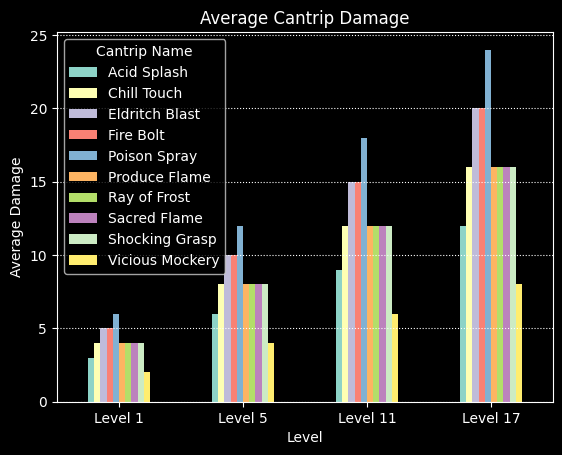

In [437]:
cantrips_graph.plot(kind = 'bar')
plt.grid(axis = 'y', linestyle=':')
plt.title('Average Cantrip Damage')
plt.xticks(rotation = 0)
plt.xlabel('Level')
plt.ylabel('Average Damage')
plt.show()